In [1]:
import re
import pandas as pd
from datetime import datetime, timedelta,date
import numpy as np
import json
import os
from calendar import monthrange
import pymysql
import sys 
import requests
import matplotlib.pyplot as plt
from elasticsearch.helpers import scan
import seaborn as sns 
import datetime as dt

In [2]:
df=pd.read_excel('C:/Users/PC/Downloads/KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='NewCustomerList',header=1,index_col=0)
df

C:\Users\PC\AppData\Local\Temp\ipykernel_20240\2937510182.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df=pd.read_excel('C:/Users/PC/Downloads/KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='NewCustomerList',header=1,index_col=0)


,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
first_name,,,,,,,,,,,,,,,,,,,,,
Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,...,QLD,Australia,6,0.56,0.7000,0.875000,0.743750,1,1,1.718750
Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,...,NSW,Australia,11,0.89,0.8900,1.112500,0.945625,1,1,1.718750
Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,...,VIC,Australia,5,1.01,1.0100,1.010000,1.010000,1,1,1.718750
Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,...,QLD,Australia,1,0.87,1.0875,1.087500,1.087500,4,4,1.703125
Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,...,NSW,Australia,9,0.52,0.5200,0.650000,0.650000,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,...,NSW,Australia,7,0.79,0.7900,0.790000,0.790000,996,996,0.374000
Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,...,NSW,Australia,10,0.76,0.7600,0.950000,0.807500,997,997,0.357000
Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,...,QLD,Australia,2,0.85,1.0625,1.062500,1.062500,997,997,0.357000


In [3]:
df.columns

Index(['last_name', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'address', 'postcode',
       'state', 'country', 'property_valuation', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [4]:
df[df.duplicated()].sum()

C:\Users\PC\AppData\Local\Temp\ipykernel_20240\482248120.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df.duplicated()].sum()


last_name                              0.0
gender                                 0.0
past_3_years_bike_related_purchases    0.0
job_title                              0.0
job_industry_category                  0.0
wealth_segment                         0.0
deceased_indicator                     0.0
owns_car                               0.0
tenure                                 0.0
address                                0.0
postcode                               0.0
state                                  0.0
country                                0.0
property_valuation                     0.0
Unnamed: 16                            0.0
Unnamed: 17                            0.0
Unnamed: 18                            0.0
Unnamed: 19                            0.0
Unnamed: 20                            0.0
Rank                                   0.0
Value                                  0.0
dtype: float64

In [5]:
df.isna().sum()

last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int64

In [6]:
df=df.dropna()
df 

,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
first_name,,,,,,,,,,,,,,,,,,,,,
Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,...,QLD,Australia,6,0.56,0.7000,0.875000,0.743750,1,1,1.718750
Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,...,NSW,Australia,11,0.89,0.8900,1.112500,0.945625,1,1,1.718750
Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,...,VIC,Australia,5,1.01,1.0100,1.010000,1.010000,1,1,1.718750
Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,...,QLD,Australia,1,0.87,1.0875,1.087500,1.087500,4,4,1.703125
Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,...,NSW,Australia,9,0.52,0.5200,0.650000,0.650000,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,...,NSW,Australia,7,0.79,0.7900,0.790000,0.790000,996,996,0.374000
Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,...,NSW,Australia,10,0.76,0.7600,0.950000,0.807500,997,997,0.357000
Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,...,QLD,Australia,2,0.85,1.0625,1.062500,1.062500,997,997,0.357000


In [7]:
df['age']=date.today().year - df['DOB'].dt.year
df 

C:\Users\PC\AppData\Local\Temp\ipykernel_20240\2597292128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age']=date.today().year - df['DOB'].dt.year


,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age
first_name,,,,,,,,,,,,,,,,,,,,,
Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,...,Australia,6,0.56,0.7000,0.875000,0.743750,1,1,1.718750,65
Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,...,Australia,11,0.89,0.8900,1.112500,0.945625,1,1,1.718750,52
Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,...,Australia,5,1.01,1.0100,1.010000,1.010000,1,1,1.718750,48
Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,...,Australia,1,0.87,1.0875,1.087500,1.087500,4,4,1.703125,43
Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,...,Australia,9,0.52,0.5200,0.650000,0.650000,4,4,1.703125,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,...,Australia,7,0.79,0.7900,0.790000,0.790000,996,996,0.374000,63
Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,...,Australia,10,0.76,0.7600,0.950000,0.807500,997,997,0.357000,21
Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,...,Australia,2,0.85,1.0625,1.062500,1.062500,997,997,0.357000,68


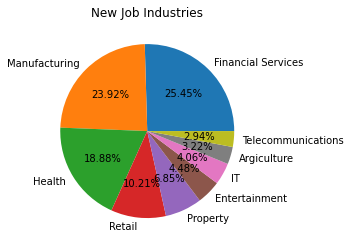

In [8]:
df['job_industry_category'].value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('New Job Industries')
plt.ylabel('')
plt.show()

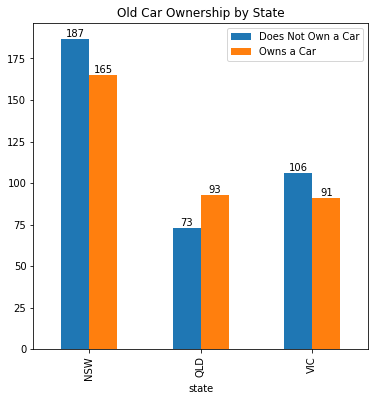

In [9]:
ax=df.groupby('state')['owns_car'].value_counts().unstack(level=1).plot.bar(stacked=False,figsize=(6,6))
for i in ax.containers:
    ax.bar_label(i)
plt.title('Old Car Ownership by State')
plt.legend(['Does Not Own a Car', 'Owns a Car'])
plt.show()

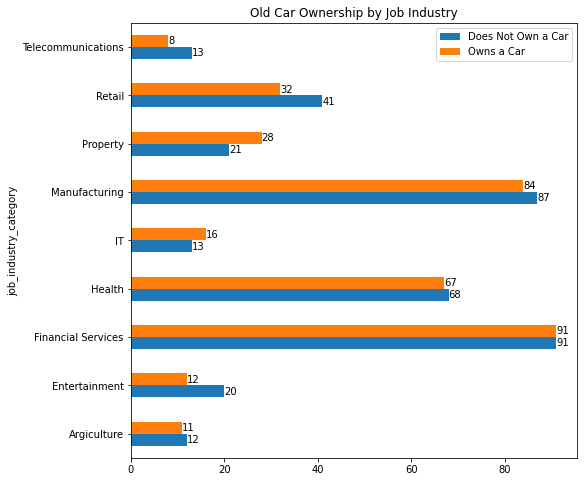

In [10]:
ax=df.groupby('job_industry_category')['owns_car'].value_counts().unstack(level=1).plot.barh(stacked=False,figsize=(8,8))
for i in ax.containers:
    ax.bar_label(i)
plt.title('Old Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'])
plt.show()

(array([ 71.,  75.,  44.,  85., 110.,  85.,  65.,  91.,  39.,  50.]),
 array([20. , 26.4, 32.8, 39.2, 45.6, 52. , 58.4, 64.8, 71.2, 77.6, 84. ]),
 <BarContainer object of 10 artists>)

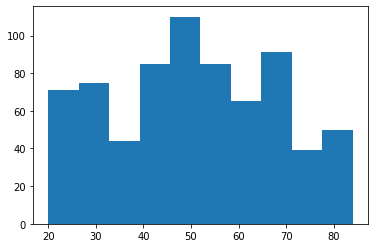

In [12]:
plt.hist(df['age'])

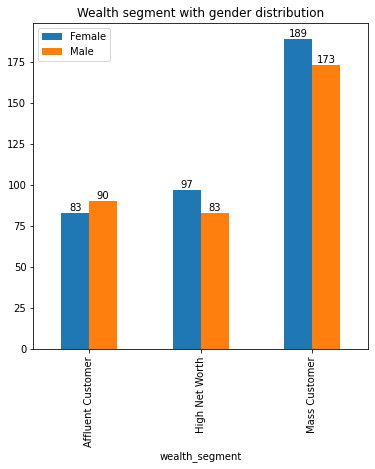

In [19]:
ax=df.groupby('wealth_segment')['gender'].value_counts().unstack(level=1).plot.bar(stacked=False,figsize=(6,6))
for i in ax.containers:
    ax.bar_label(i)
plt.title('Wealth segment with gender distribution')
plt.legend(['Female', 'Male'])
plt.show()

Text(0.5, 1.0, 'Customer with state,gender distribution')

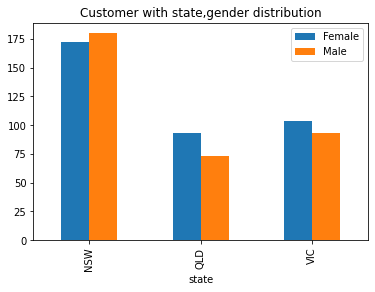

In [18]:
df.pivot_table(index='state',columns='gender',values='age',aggfunc='count').plot.bar()
plt.legend()
plt.title('Customer with state,gender distribution')